In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#simple image scaling to (nR x nC) size
def scale(im, nR, nC):
    nR0 = len(im)     # source number of rows 
    nC0 = len(im[0])  # source number of columns 
    blockSizeR = int(np.ceil(nR0/nR))
    blockSizeC = int(np.ceil(nC0/nC))
    
    if nR0 >= nR and nC0 >= nC:

        outarray = np.zeros((nR,nC))

        for r in range(nR):
            for c in range(nC):
                if blockSizeR*(r+1) > nR0 - 1:
                    stopR = nR0
                else:
                    stopR = blockSizeR*(r+1)
                if blockSizeC*(c+1) > nC0 - 1:
                    stopC = nC0
                else:
                    stopC = blockSizeC*(c+1) 

                outarray[r,c] = np.sum(im[blockSizeR*r:stopR,blockSizeC*c:stopC])
        return outarray
    else:
        print("image can only be downsampled")
        return im

In [2]:
filename = "20200323_Mouse_brain_13C_12Cnontumor2.txt"
nrows = 60
ncols = 60

In [3]:
data = [r.strip().split() for r in open(filename,"r").readlines()[3:]]
data = {(x[0],float(x[1]),float(x[2])):{mz:float(i) for mz,i in zip(data[0],x[3:])} for x in data[1:] if len(x) > 0}
data = pd.DataFrame.from_dict(data,orient="index")
print(data)

                   554.2615  355.1380  283.2637  255.2324  233.1543  555.2646  \
1    0.20  -10.00       0.0    2105.0       0.0    8403.0    1559.0       0.0   
2    0.45  -10.00       0.0    2652.0       0.0    9275.0    1790.0       0.0   
3    0.70  -10.00       0.0    2355.0       0.0    9721.0    1929.0       0.0   
4    0.95  -10.00       0.0    3054.0       0.0    8875.0    1773.0       0.0   
5    1.20  -10.00       0.0    2707.0       0.0    9260.0    2032.0       0.0   
...                     ...       ...       ...       ...       ...       ...   
4556 28.95 -0.75        0.0    1729.0       0.0    1224.0    1526.0       0.0   
4557 29.20 -0.75        0.0    1767.0       0.0     495.0    1042.0       0.0   
4558 29.45 -0.75        0.0    2457.0       0.0     941.0     885.0       0.0   
4559 29.70 -0.75        0.0    2020.0       0.0     811.0    1234.0       0.0   
4560 29.95 -0.75        0.0    2038.0       0.0    1129.0    1188.0       0.0   

                   303.2321

In [4]:
cols = data.columns.values
mzs = cols
print(len(mzs))

1000


In [5]:
tensor = []
for mz in mzs:
    picDict = {}
    for index,row in data.iterrows():
        picDict[(index[2],index[1])] = row[mz]

    xcords = [float(y) for y in list(set([x[0] for x in picDict]))]
    ycords = [float(y) for y in list(set([x[1] for x in picDict]))]
    outarray = np.zeros((len(xcords),len(ycords)))
    xcords.sort()
    ycords.sort()
    xcordMap = {x:i for x,i in zip(xcords,range(len(xcords)))}
    ycordMap = {x:i for x,i in zip(ycords,range(len(ycords)))}
    for [x,y],intens in picDict.items():
        outarray[xcordMap[float(x)],ycordMap[float(y)]] = intens
        
    outarray = scale(outarray,nrows,ncols)
    tensor.append(outarray)
#     plt.figure()
#     plt.imshow(outarray)
#     plt.title(mz)
#     outfile = open(mz+".txt","w")
#     for r in outarray:
#         for c in r:
#             outfile.write(str(c)+"\t")
#         outfile.write("\n")
#     outfile.close()

    
        

image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can 

image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can 

image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can 

image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can only be downsampled
image can 

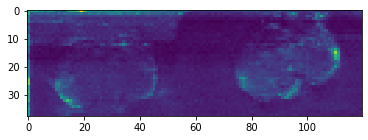

In [7]:
nrows = len(tensor[0])
ncols = len(tensor[0][0])
sumPicture = np.zeros((nrows,ncols))
for r in range(nrows):
    for c in range(ncols):
        sumPicture[r,c] = np.sum([t[r,c] for t in tensor])
plt.imshow(sumPicture)

In [8]:
X = []
coords = []
for r in range(nrows):
    for c in range(ncols):
        X.append([mat[r,c] for mat in tensor])
        coords.append([r,c])    

In [9]:
X_embed = TSNE(n_components=2).fit_transform(X)

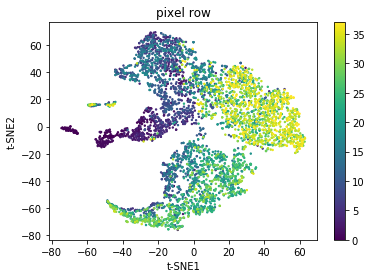

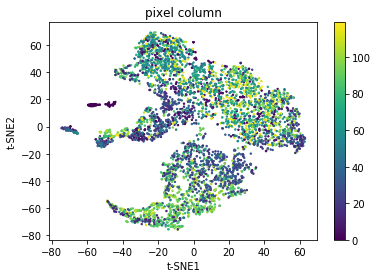

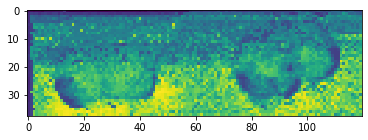

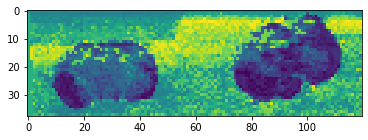

In [10]:
plt.scatter([x[0] for x in X_embed],[x[1] for x in X_embed],c=[x[0] for x in coords],s=2)
plt.colorbar()
plt.title("pixel row")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

plt.figure()
plt.title("pixel column")
plt.scatter([x[0] for x in X_embed],[x[1] for x in X_embed],c=[x[1] for x in coords],s=2)
plt.colorbar()
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

tsne1Image = np.zeros((nrows,ncols))
tsne2Image = np.zeros((nrows,ncols))
for [t1,t2],[r,c] in zip(X_embed,coords):
    tsne1Image[r,c] = t1
    tsne2Image[r,c] = t2
    
plt.figure()
plt.imshow(tsne1Image)
plt.figure()
plt.imshow(tsne2Image)

In [11]:
X = []
coords = []
for r in range(nrows):
    for c in range(ncols):
        X.append([mat[r,c]/sumPicture[r,c] for mat in tensor])
        coords.append([r,c])  
        
X_embed = TSNE(n_components=2).fit_transform(X)

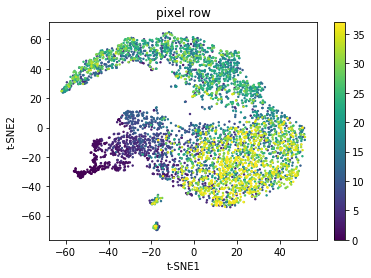

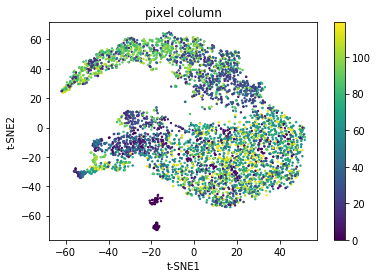

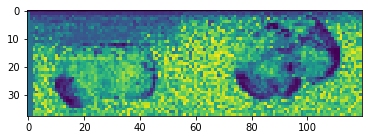

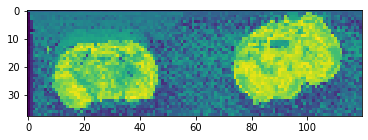

In [12]:
plt.scatter([x[0] for x in X_embed],[x[1] for x in X_embed],c=[x[0] for x in coords],s=2)
plt.colorbar()
plt.title("pixel row")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

plt.figure()
plt.title("pixel column")
plt.scatter([x[0] for x in X_embed],[x[1] for x in X_embed],c=[x[1] for x in coords],s=2)
plt.colorbar()
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

tsne1Image = np.zeros((nrows,ncols))
tsne2Image = np.zeros((nrows,ncols))
for [t1,t2],[r,c] in zip(X_embed,coords):
    tsne1Image[r,c] = t1
    tsne2Image[r,c] = t2
    
plt.figure()
plt.imshow(tsne1Image)
plt.figure()
plt.imshow(tsne2Image)